In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('/home/dell/python_machine_learning/disease/csv/liver.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
gender=pd.get_dummies(data['Gender'])
gender.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [5]:
gender=pd.get_dummies(data['Gender'],drop_first=True)
gender.head()

,Male
0,0
1,1
2,1
3,1
4,1


In [6]:
data = pd.concat([data,gender], axis=1)

In [7]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [8]:
data.drop(['Gender'] , axis=1 , inplace=True)

In [9]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [10]:
data = data.dropna(axis = 0)  

In [11]:
x=data[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Male']]
y=data['Dataset']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


# print(y_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[97,  7],
       [34,  7]])

In [19]:
accuracy_score(y_pred,y_test)

0.7172413793103448

# Decision Tree

In [20]:
from sklearn import tree
from sklearn import metrics

In [21]:
features=['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']

In [22]:
x= data[features] # Features
y =data['Dataset']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [24]:
clf = tree.DecisionTreeClassifier()

In [25]:
clf = clf.fit(X_train,y_train)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6781609195402298


In [28]:
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydotplus


clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('liver_disease.png')
Image(graph.create_png())
plt.show()

Accuracy: 0.7413793103448276


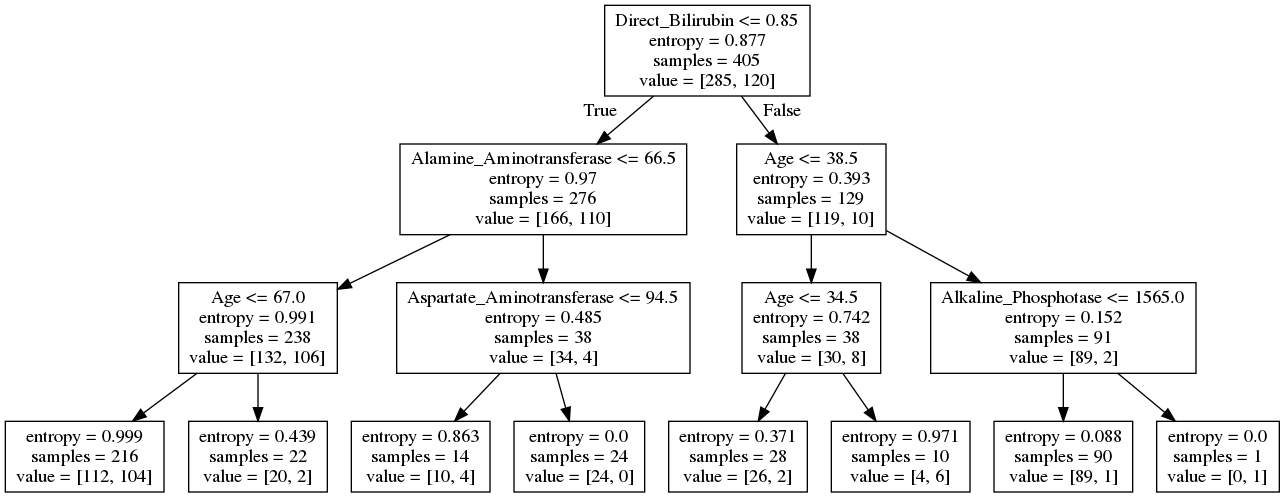

In [29]:
dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=features)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# KMeans

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

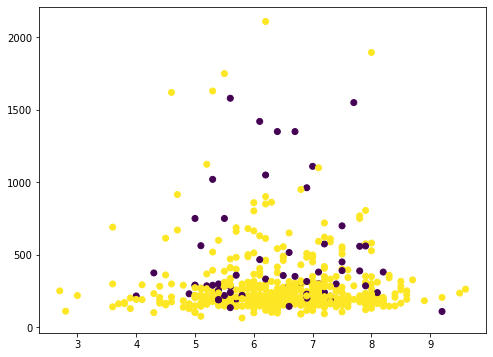

In [30]:
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random,float

dt=data[['Total_Protiens','Alkaline_Phosphotase']]
model=KMeans(n_clusters=2)

#Note scaling the data to normalize it! important for good results.

model=model.fit(scale(data))

#we can look at the clusters each data point was assigned to
print(model.labels_)

#and we will visualize it

plt.figure(figsize=(8,6))
plt.scatter(dt['Total_Protiens'],dt['Alkaline_Phosphotase'],c=model.labels_.astype(float))

plt.show()